In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression #, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures
import lmdiag
# from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import mean_squared_error

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Problem 1

### a) Create a random vector X containing 100 observations drawn from a N(0, 1) distribution

In [63]:
X = np.random.normal(0, 1, 100)

### b) Create a vector e containing 100 observations drawn from a N(0, 0.25) distribution

In [64]:
e = np.random.normal(0, 0.25, 100)

### c) Generate a vector Y according to the model    Y = −1 + 0.5X + e

In [65]:
Y = -1 + 0.5*X + e

### d) Create a scatterplot displaying the relationship between X and Y. Comment on what you observe

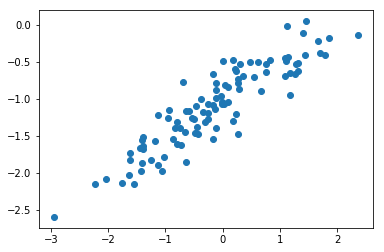

In [66]:
plt.scatter(x=X, y=Y);
plt.show()

The graph shows a linear relationship

### e) Fit a least squares linear model to predict Y using X.  
Comment on the model obtained (p-values, accuracy measures, ...).  
How do β̂ 0 and β̂ 1 compare to β0 and β1

In [67]:
X_with_const = sm.add_constant(X)
model1 = sm.OLS(Y, X_with_const).fit()
print(model1.summary())#.tables[0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     449.3
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.20e-38
Time:                        00:31:02   Log-Likelihood:                 2.5093
No. Observations:                 100   AIC:                            -1.019
Df Residuals:                      98   BIC:                             4.192
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0333      0.024    -42.991      0.0

β^o and β^1 are practically equal to βo and β1. As expected, β^o and β^1 are statistically signficant and Adj. R-square = 0.824 shows that the model fits the data quite well.

We obtain the same result by using sklearn LinearRegression

In [68]:
model2 = LinearRegression()
model2.fit(X=X_with_const, y=Y)
print(model2.coef_)
print(model2.intercept_)
# print(model2.score)

[0.         0.49476617]
-1.033326215698638


### f) Display the least squares line on the scatterplot obtained in d). Draw the population regression line on the plot, in a different color. Create appropriate legends

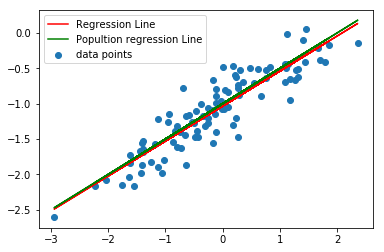

In [69]:
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model1.fittedvalues, color='red', label="Regression Line")
plt.plot(X, -1 + 0.5*X, color='green', label="Popultion regression Line")
plt.legend()
plt.show();

### g) Fit a polynomial regression model that predicts Y using X and X^2. Is there evidence that the quadratic term improves the model fit? Explain your answer

In [70]:
X2 = (X_with_const[:, 1] ** 2).reshape(100, 1)
X_poly = np.append(X_with_const, X2, axis=1)

In [71]:
print(X_poly[:5,:])

[[ 1.00000000e+00  1.65691153e+00  2.74535583e+00]
 [ 1.00000000e+00  2.13782999e-01  4.57031707e-02]
 [ 1.00000000e+00  8.51483811e-03  7.25024680e-05]
 [ 1.00000000e+00 -5.02340027e-01  2.52345503e-01]
 [ 1.00000000e+00 -1.64131350e+00  2.69391000e+00]]


In [72]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree = 2)
# X_poly = poly.fit_transform(X_with_const)
# print(X_poly)

model3 = sm.OLS(Y, X_poly).fit()
print(model3.summary())#.tables[0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           6.48e-38
Time:                        00:31:03   Log-Likelihood:                 4.7832
No. Observations:                 100   AIC:                            -3.566
Df Residuals:                      97   BIC:                             4.249
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9955      0.030    -33.652      0.0

As we can see from above summary, p-value for second feature is equal to 0.284 which means that X^2 feature is not important.

### h) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results

At first let's modify the data generation process in such a way that there is less noise in the data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2559.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           4.89e-72
Time:                        00:31:03   Log-Likelihood:                 87.313
No. Observations:                 100   AIC:                            -170.6
Df Residuals:                      98   BIC:                            -165.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9936      0.010    -96.524      0.0

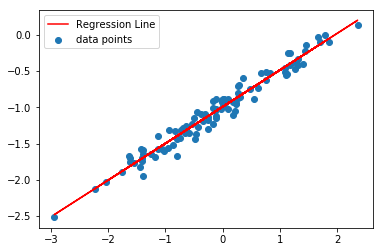

In [73]:
e = np.random.normal(0, 0.1, 100)
Y = -1 + 0.5*X + e
model_less_noise = sm.OLS(Y, X_with_const).fit()
print(model_less_noise.summary())#.tables[0]
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model_less_noise.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show();

In case of less noise data, we obtain more accurate predicted coefficients for β0 and β1, and Adj. R.squared = 0.965

Now the case of noisier data set.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           4.65e-17
Time:                        00:31:03   Log-Likelihood:                -69.847
No. Observations:                 100   AIC:                             143.7
Df Residuals:                      98   BIC:                             148.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0161      0.050    -20.504      0.0

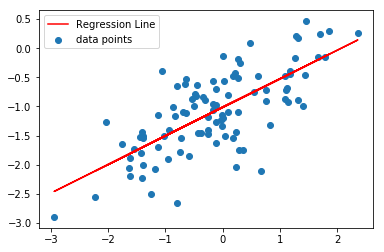

In [74]:
e = np.random.normal(0, 0.5, 100)
Y = -1 + 0.5*X + e
model_noisier = sm.OLS(Y, X_with_const).fit()
print(model_noisier.summary())#.tables[0]
plt.scatter(x=X, y=Y, label="data points")
plt.plot(X, model_noisier.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show();

In noisier data set, Adj. R-squared = 0.674, nevertheless predicted coefficients are close to actual coefficients

Now let's see what are the confidence intervals for βo and β1 based on the original data set, the noisier data set, and the less noisy data set?

In [75]:
print('Confidence Intervals for original data set')
print(model1.conf_int())
print('\n')
print('Confidence Intervals for less noise data set')
print(model_less_noise.conf_int())
print('\n')
print('Confidence Intervals for noisier data set')
print(model_noisier.conf_int())

Confidence Intervals for original data set
[[-1.08102505 -0.98562738]
 [ 0.44844666  0.54108568]]


Confidence Intervals for less noise data set
[[-1.01400712 -0.97315249]
 [ 0.48580559  0.52547882]]


Confidence Intervals for noisier data set
[[-1.11447529 -0.91778792]
 [ 0.39494816  0.58594784]]


From the above results we can say that the lenght of the confidence intervals is small for less noise data set and big for noisier data set

# Problem 2: Use “Auto” data set.

### a) Perform a simple linear regression with “mpg” as the response and “horsepower” as the predictor

In [76]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


In [77]:
print(max(auto.mpg))
print(min(auto.mpg))
print(max(auto.horsepower))
print(min(auto.horsepower))

46.6
9.0
230.0
46.0


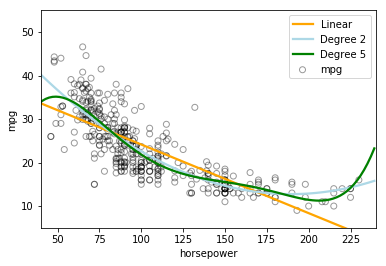

In [78]:
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.4)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [79]:
auto_simple_regression = smf.ols('mpg ~ horsepower', auto).fit()
print(auto_simple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           7.03e-81
Time:                        00:31:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

P-value for horsepower feature is 0 therefore we can say that there is some linear relationship between the predictor and the response.  
Moreover, confidence interval is [-0.171      -0.145], and 0 is not there which is also good thing. That's mean that the coefficient can not be 0 in mean.

In [80]:
print('Predicted value for 98th horseposer: ')
print(auto_simple_regression.predict(auto.horsepower.iloc[97:98,]))
print('\n')
print('Actual value of 98th mpg: ')
print(auto.iloc[97:98,0])

Predicted value for 98th horseposer: 
98    24.151388
dtype: float64


Actual value of 98th mpg: 
98    16.0
Name: mpg, dtype: float64


In [82]:
# auto_simple_regression.conf_int()

In [87]:
data = [[98]]
df = pd.DataFrame(data, columns = ['horsepower'])
auto_simple_regression.predict(df)

0    24.467077
dtype: float64

In [88]:
predictions = auto_simple_regression.get_prediction(df)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


confidence interval is [23.973079, 24.961075]. Prediction interval is [14.809396, 34.124758]

In [20]:
# auto.horsepower.iloc[97:98,]

### b) Plot the response and the predictor. Display the least squares regression line

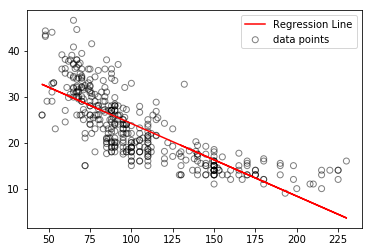

In [21]:
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5, label="data points")
plt.plot(auto.horsepower, auto_simple_regression.fittedvalues, color='red', label="Regression Line")
plt.legend()
plt.show();

### c) Produce diagnostic plots. Comment on any problems you see with the fit
### d) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

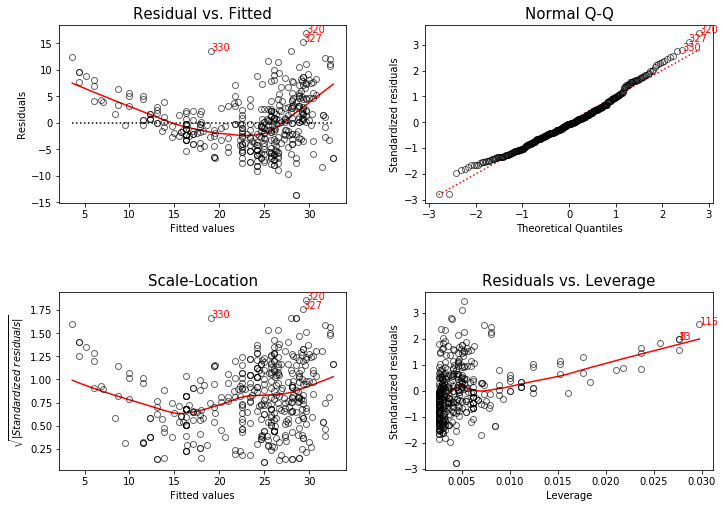

In [22]:
plt.figure(figsize=(10,7))
lmdiag.plot(auto_simple_regression)
plt.show();

The four plots show potential problematic cases with the row numbers of the data in the dataset. If some cases are identified across all four plots, we might want to take a close look at them individually. Is there anything special for the subject? Or could it be simply errors in data entry?

### 1. Residuals vs Fitted
This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If we find equally spread residuals around a horizontal line without distinct patterns, that is a good indication we don’t have non-linear relationships.  
I see a parabola in our case, so the non-linear relationship was not explained by the model and was left out in the residuals.

### 2. Normal Q-Q
This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely? It’s good if residuals are lined well on the straight dashed line.  
Notice the points form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean our sample data are skewed.

### 3. Scale-Location
It’s also called Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. This is how we can check the assumption of equal variance (homoscedasticity). It’s good if we see a horizontal line with equally (randomly) spread points.  
In our case, the red smooth line is not horizontal and shows a steep angle.

### 4. Residuals vs Leverage
This plot helps us to find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis. Even though data have extreme values, they might not be influential to determine a regression line. That means, the results wouldn’t be much different if we either include or exclude them from analysis. They follow the trend in the majority of cases and they don’t really matter; they are not influential. On the other hand, some cases could be very influential even if they look to be within a reasonable range of the values. They could be extreme cases against a regression line and can alter the results if we exclude them from analysis. Another way to put it is that they don’t get along with the trend in the majority of the cases.  
  
Unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. Look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.  
  
Our case is the typical look when there is no influential case.

### So, what does having patterns in residuals mean to our research? 
It’s not just a go-or-stop sign. It tells us about our model and data. Our current model might not be the best way to understand our data if there’s so much good stuff left in the data.

In that case, we may want to go back to our theory and hypotheses. Is it really a linear relationship between the predictors and the outcome? We may want to **include a quadratic term**, for example. A log transformation may better represent the phenomena that we’d like to model. Or, is there any important variable that we left out from our model? Other variables we didn’t include may play an important role in our model and data.  
#### Checking residuals is a way to discover new insights in our model and data!

# Problem 3. Use “Carseats” data set.

In [23]:
# auto = pd.read_csv('Carseats.csv', na_values='?').dropna()
carseats = pd.read_csv('Carseats.csv')
print(carseats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB
None


In [24]:
carseats.select_dtypes(include='object').columns.values

array(['ShelveLoc', 'Urban', 'US'], dtype=object)

In [25]:
# carseats.ShelveLoc.unique()
# carseats.Urban.unique()
carseats.US.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
carseats.Urban = carseats.Urban.map({'Yes':1, 'No':0})
carseats.US = carseats.US.map({'Yes':1, 'No':0})

### a) Fit a multiple regression model to predict “Sales” using “Price”, “Urban”, and “US” (score=2).

In [27]:
# X = carseats[["Price", "Urban", "US"]]
# y = carseats[["Sales"]]

In [28]:
carseats_multiple_regression = smf.ols(formula="Sales ~ Price + Urban + US", data=carseats).fit()

### b) For which of the predictors can you reject the null hypothesis H0: βj = 0

In [29]:
print(carseats_multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.39e-23
Time:                        00:26:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

From the summary above we can reject the null hypothesis only for "Urban" feature, because the corresponding p-value = 0.936.

### c) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome

In [30]:
carseats_smaller_multiple_regression = smf.ols(formula="Sales ~ Price + US", data=carseats).fit()

In [31]:
print(carseats_smaller_multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.66e-24
Time:                        00:26:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### d) How well do the models in a) and c) fit the data.

Adj. R-squared for both cases almost the same:  
In first model (with Urban feature) it is = 0.234  
And in second model (without Urban feature) it is = 0.235  
  
And the first question that we are interesting is why we chose Adj. R-squared instead of R-squared and what they are,  
So let's answer that questions.  
At first **What Is R-squared**?  
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.  
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:  
R-squared = Explained variation / Total variation  
  
R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.
  
**Some Problems with R-squared**  
Problem 1: Every time we add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.  
Problem 2: If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. This condition is known as overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.  
  
**What Is the Adjusted R-squared?**  
The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.  
Suppose we compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!  
The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.  

### e) Using the model from c), obtain 95% confidence intervals for the coefficient(s)

In [32]:
carseats_smaller_multiple_regression.conf_int(alpha = .05)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### f) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit

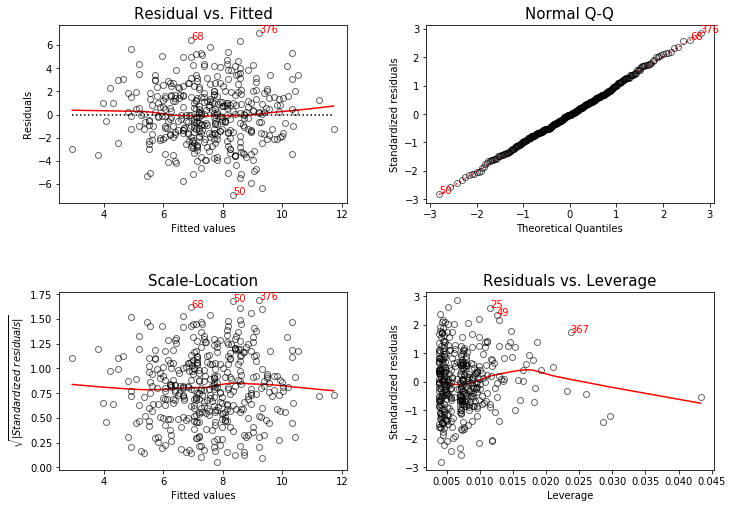

In [33]:
plt.figure(figsize=(10,7))
lmdiag.plot(carseats_smaller_multiple_regression)
plt.show();

I do not see any problem related with diagnostic plots.

### g) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

We do not have high leverage influential points, but we have outliers that should be excluded from the data set.

In [34]:
outliers = carseats.index.isin([68, 50, 376])
# carseats.iloc[[68, 50, 376]]
carseats = carseats[~outliers]

# Problem 4. Use “Auto” data set

In [35]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [36]:
auto.select_dtypes(include='object').columns.values

array(['name'], dtype=object)

In [37]:
auto.select_dtypes(exclude='object').columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

### a) Produce a scatterplot matrix which includes all of the variables in the data set (score=2).

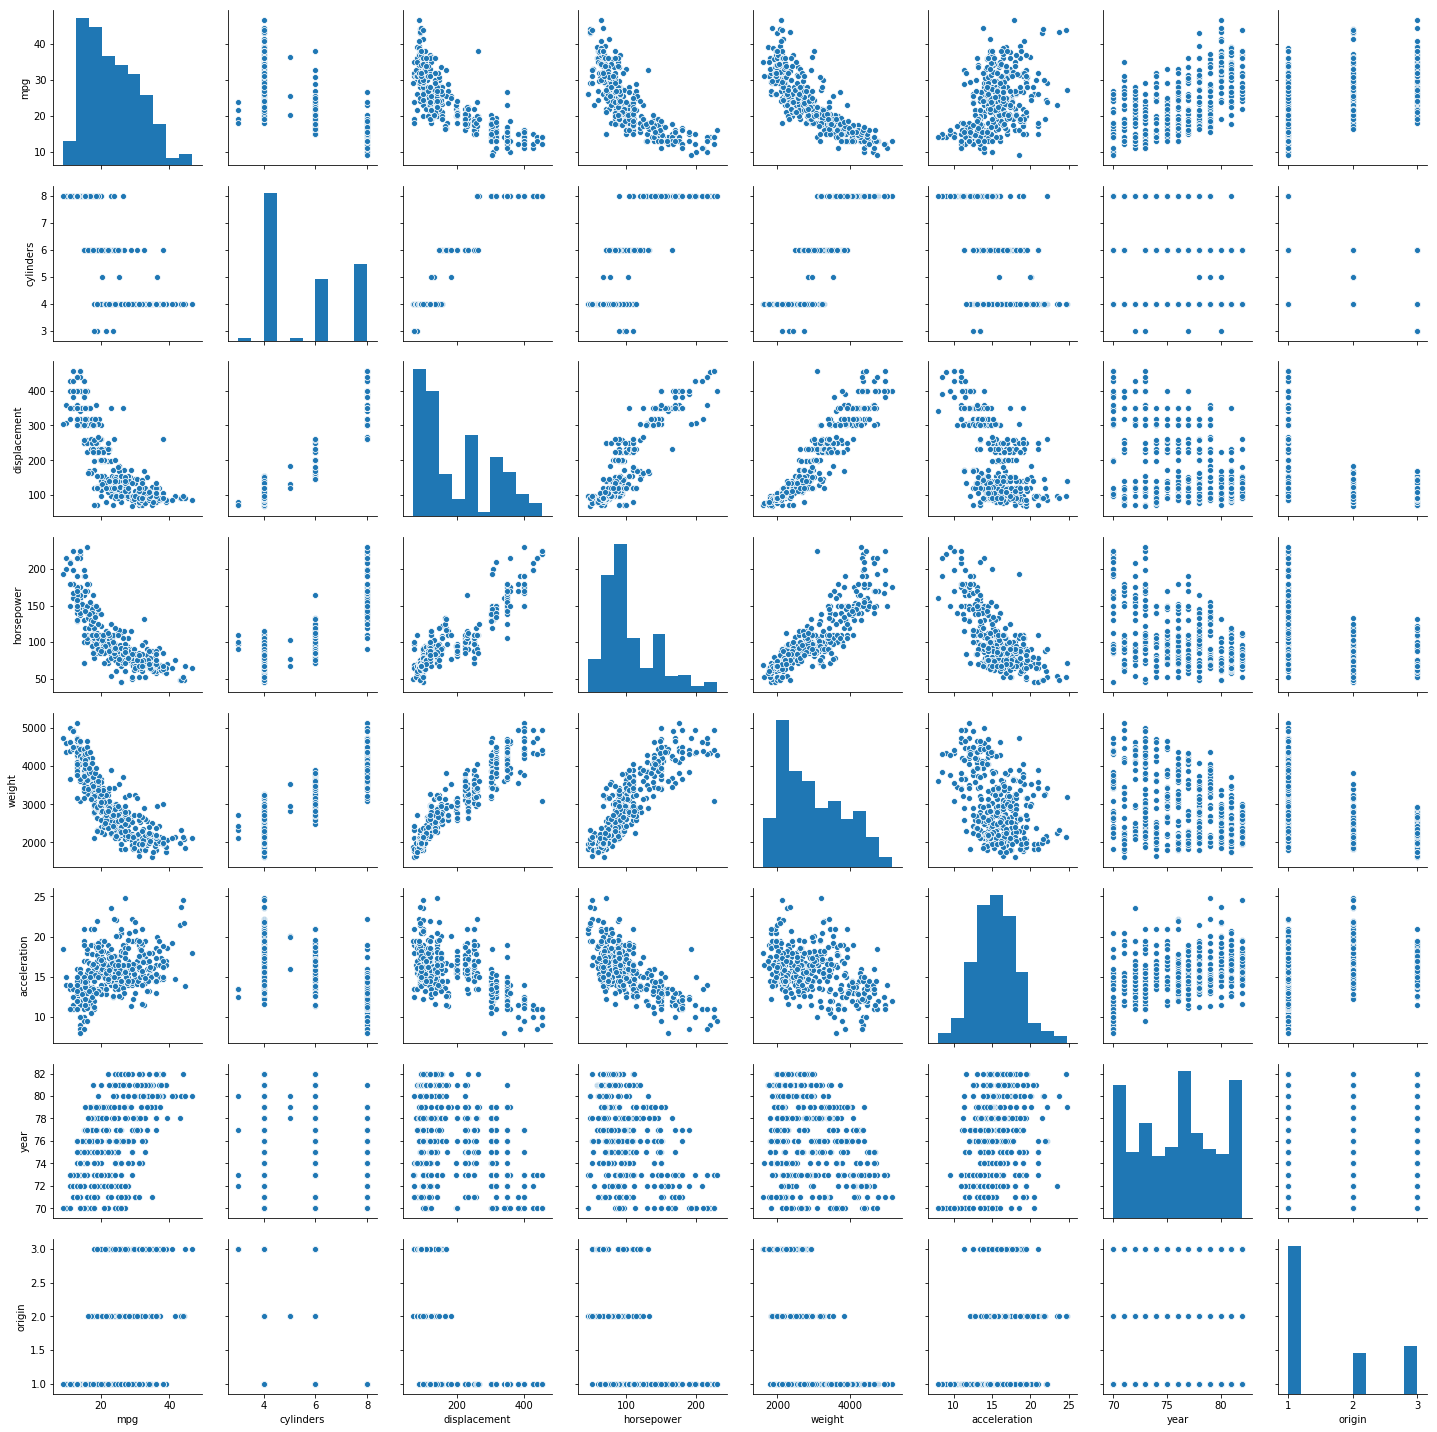

In [38]:
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]);

### b) Compute the matrix of correlations between the variables. You will need to exclude the “name” variable, which is qualitative

In [39]:
# correlation between features and target variable
auto.drop(["mpg", "name"], axis=1).apply(lambda x: x.corr(auto.mpg))

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin          0.565209
dtype: float64

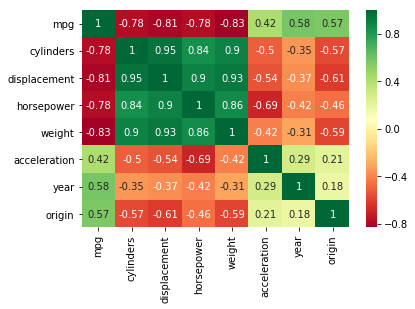

In [40]:
corr = auto.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn",
            annot=True
           );

### c) Perform a multiple linear regression with “mpg” as the response and all other variables except “name” as the predictors. Comment on the output:
I. Is there a relationship between the predictors and the response?  
II. Which predictors appear to have a statistically significant relationship to the response?  
III.What does the coefficient for the “year” variable suggest?

In [41]:
auto.drop(axis=1, columns=["name"], inplace=True)

In [42]:
auto.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

In [43]:
auto_full_regression = smf.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto).fit()

In [44]:
print(auto_full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          2.04e-139
Time:                        00:27:02   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

So the predictors "displacement", "weight", "year" and "origin" are statistically significant because their corresponding p-value is lesser than 0.005, therefore we can say that there is a relationship between the predictors(some of them) and the response.  
The coefficient of year variable is equal to 0.7508, which indicates that for every additional number in year we can expect mpg to increase by an average of 0.7508 unit.

### d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit

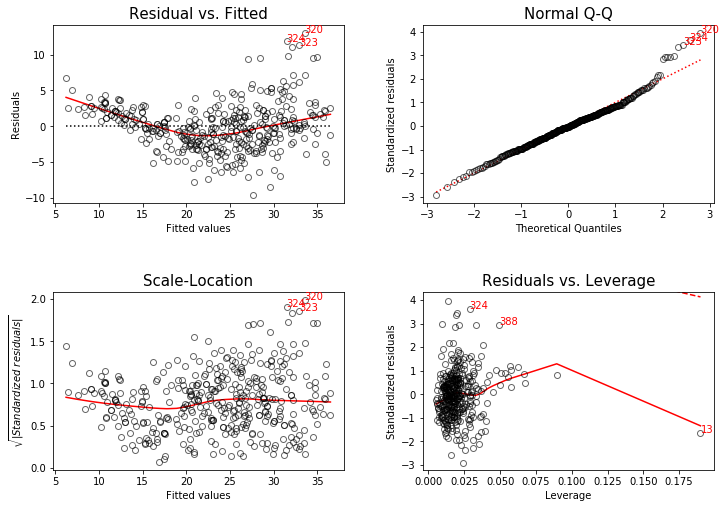

In [45]:
plt.figure(figsize=(10,7))
lmdiag.plot(auto_full_regression)
plt.show();

I see a parabola in residual vs. fitted values plot, so the non-linear relationship was not explained by the model and was left out in the residuals.

### e) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

In [46]:
outliers = auto.index.isin([320, 323, 324])
auto = auto[~outliers]

### f) Add interaction effects. Do any interactions appear to be statistically significant

In [47]:
# from sklearn.preprocessing import PolynomialFeatures

# interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
# X_inter = interaction.fit_transform(X)
# X_inter.shape

In [48]:
s = ("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + "
     "cylinders*displacement + "
     "cylinders*horsepower + "
     "cylinders*weight + "
     "cylinders*acceleration + "
     "cylinders*year + "
     "cylinders*origin + "
     "displacement*horsepower + "
     "displacement*weight + "
     "displacement*acceleration + "
     "displacement*year + "
     "displacement*origin + "
     "horsepower*weight + "
     "horsepower*acceleration + "
     "horsepower*year + "
     "horsepower*origin + "
     "weight*acceleration + "
     "weight*year + "
     "weight*origin + "
     "acceleration*year + "
     "acceleration*origin + "
     "year*origin"
    )
auto_with_interaction_regression = smf.ols(formula=s, data=auto).fit()

In [49]:
print(auto_with_interaction_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          1.87e-154
Time:                        00:27:05   Log-Likelihood:                -918.10
No. Observations:                 389   AIC:                             1894.
Df Residuals:                     360   BIC:                             2009.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

So we have 28 features. In order to choose important ones from them we can do a linear regression, and then take the statisticaly significant regressors.  
Another way to do that is using regularisation.  

With taken into consideration p-values, we can choose the following features:  
acceleration * origin  
acceleration * year  
origin  
displacement  
acceleration  
displacement * year  

### g) Try a few different transformations of the variables, such as log(X),√X, X^2.   Comment on your findings

In [50]:
auto_log = np.log(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']])

In [51]:
auto_sqrt = np.sqrt(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']])

In [52]:
auto_square = np.square(auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']])

In [53]:
# auto_log.head()

In [54]:
# auto_sqrt.head()

In [55]:
# auto_square.head()

In [56]:
# auto.head()

In [57]:
auto_lm_log = LinearRegression()
auto_lm_sqrt = LinearRegression()
auto_lm_square = LinearRegression()
auto_lm = LinearRegression()

In [58]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year', 'origin']]
y = auto[['mpg']]

In [59]:
print ("Cross-validated score of log transformed dataset:", cross_val_score(auto_lm_log, auto_log, y, cv=10).mean())
print ("Cross-validated score of sqrt transformed dataset:", cross_val_score(auto_lm_sqrt, auto_sqrt, y, cv=10).mean())
print ("Cross-validated score of square transformed dataset:", cross_val_score(auto_lm_square, auto_square, y, cv=10).mean())
print ("Cross-validated score of initial dataset:", cross_val_score(auto_lm_log, X, y, cv=10).mean())

Cross-validated score of log transformed dataset: 0.6924719396272437
Cross-validated score of sqrt transformed dataset: 0.6699917813959854
Cross-validated score of square transformed dataset: 0.6198491099432951
Cross-validated score of initial dataset: 0.6569990393852275


Comparing the results obtained above, we get the best model with log-transformed data.